In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

from functions import transform_raw_data, clean_df, impute_fit_df, impute_transform_df

In [48]:
df = transform_raw_data(path_to_csv="stats19CycleCollisions2022.csv")
df = clean_df(df)
categorical_freqs, vars_to_groupby, continuous_medians_grouped, continuous_medians, scaler = impute_fit_df(df)
df = impute_transform_df(df, categorical_freqs, vars_to_groupby,
                         continuous_medians_grouped, continuous_medians, scaler, df.columns,
                         one_hot_encode=False)

In [102]:
# plotting correlation between features and the target
def is_continuous(series):
    return pd.api.types.is_numeric_dtype(series)

# function assumes that continuous variables are listed before categorical columns in the 'columns' input
def plot_correlation_grid(df, features, num_cols=3):
    target = 'casualty_severity'

    num_plots = len(features)
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 30))
    ax = ax.flatten()
    
    # get all pairs of variables to plot
    plotted_pairs = 0
    max_plots = num_rows * num_cols

    # trimming category labels to make the charts easier to read
    df_trimmed = df.applymap(lambda x: x[:10] if isinstance(x, str) else x)
    
    for i, feature in enumerate(features):

        ax_sub = ax[plotted_pairs]
        
        # if both variables are continuous, create a scatter plot
        if is_continuous(df_trimmed[feature]) and not is_continuous(df_trimmed[target]):
            sns.boxplot(x=df_trimmed[target], y=df_trimmed[feature], ax=ax_sub)
        else:
            # converting categories to ordinal integers
            ord_enc = OrdinalEncoder()
            enc_df = pd.DataFrame(ord_enc.fit_transform(df[[feature, target]]), columns=[feature, target])

            # Generate the random noise
            # The noise is in the range 0 to 0.5
            xnoise, ynoise = np.random.random(len(df)) / 2, np.random.random(len(df)) / 2

            # Plot the scatterplot
            ax_sub.scatter(enc_df[feature] + xnoise, enc_df[target] + ynoise, alpha=0.5)
            # setting xticks and yticks to be category names
            # centre of noise will be around 0.25, and ordinal integers increase by 1
            #ax_sub.set_xticks([i + 0.25 for i in range(len(ord_enc.categories_[0]))], ord_enc.categories_[0]) 
            ax_sub.set_yticks([i + 0.25 for i in range(len(ord_enc.categories_[1]))], ord_enc.categories_[1])

            ax_sub.grid()
            sns.despine(left=True, bottom=True, ax=ax_sub)

        ax_sub.set_title(f'{feature} vs {target}')
        #ax_sub.xaxis.set_ticks(ax_sub.get_xticks()) # add this line to avoid warning
        #ax_sub.set_xticklabels(ax_sub.get_xticklabels(), rotation=45, ha='right')
        plotted_pairs += 1
                
        if plotted_pairs >= max_plots:
            break

    for j in range(num_rows * num_cols):
        if j > plotted_pairs - 1:
            fig.delaxes(ax[j])
    
    plt.tight_layout()
    plt.show()

In [103]:
features = ['age_of_casualty','engine_capacity_cc','age_of_driver',
            'vehicle_type','junction_detail','towing_and_articulation','vehicle_manoeuvre',
            'casualty_imd_decile','pedestrian_crossing_physical_facilities','driver_imd_decile',
            'day_of_week','time_period','season',
            'first_road_class','road_type','speed_limit','junction_control','second_road_class',
            'light_conditions','weather_conditions','road_surface_conditions','propulsion_code']

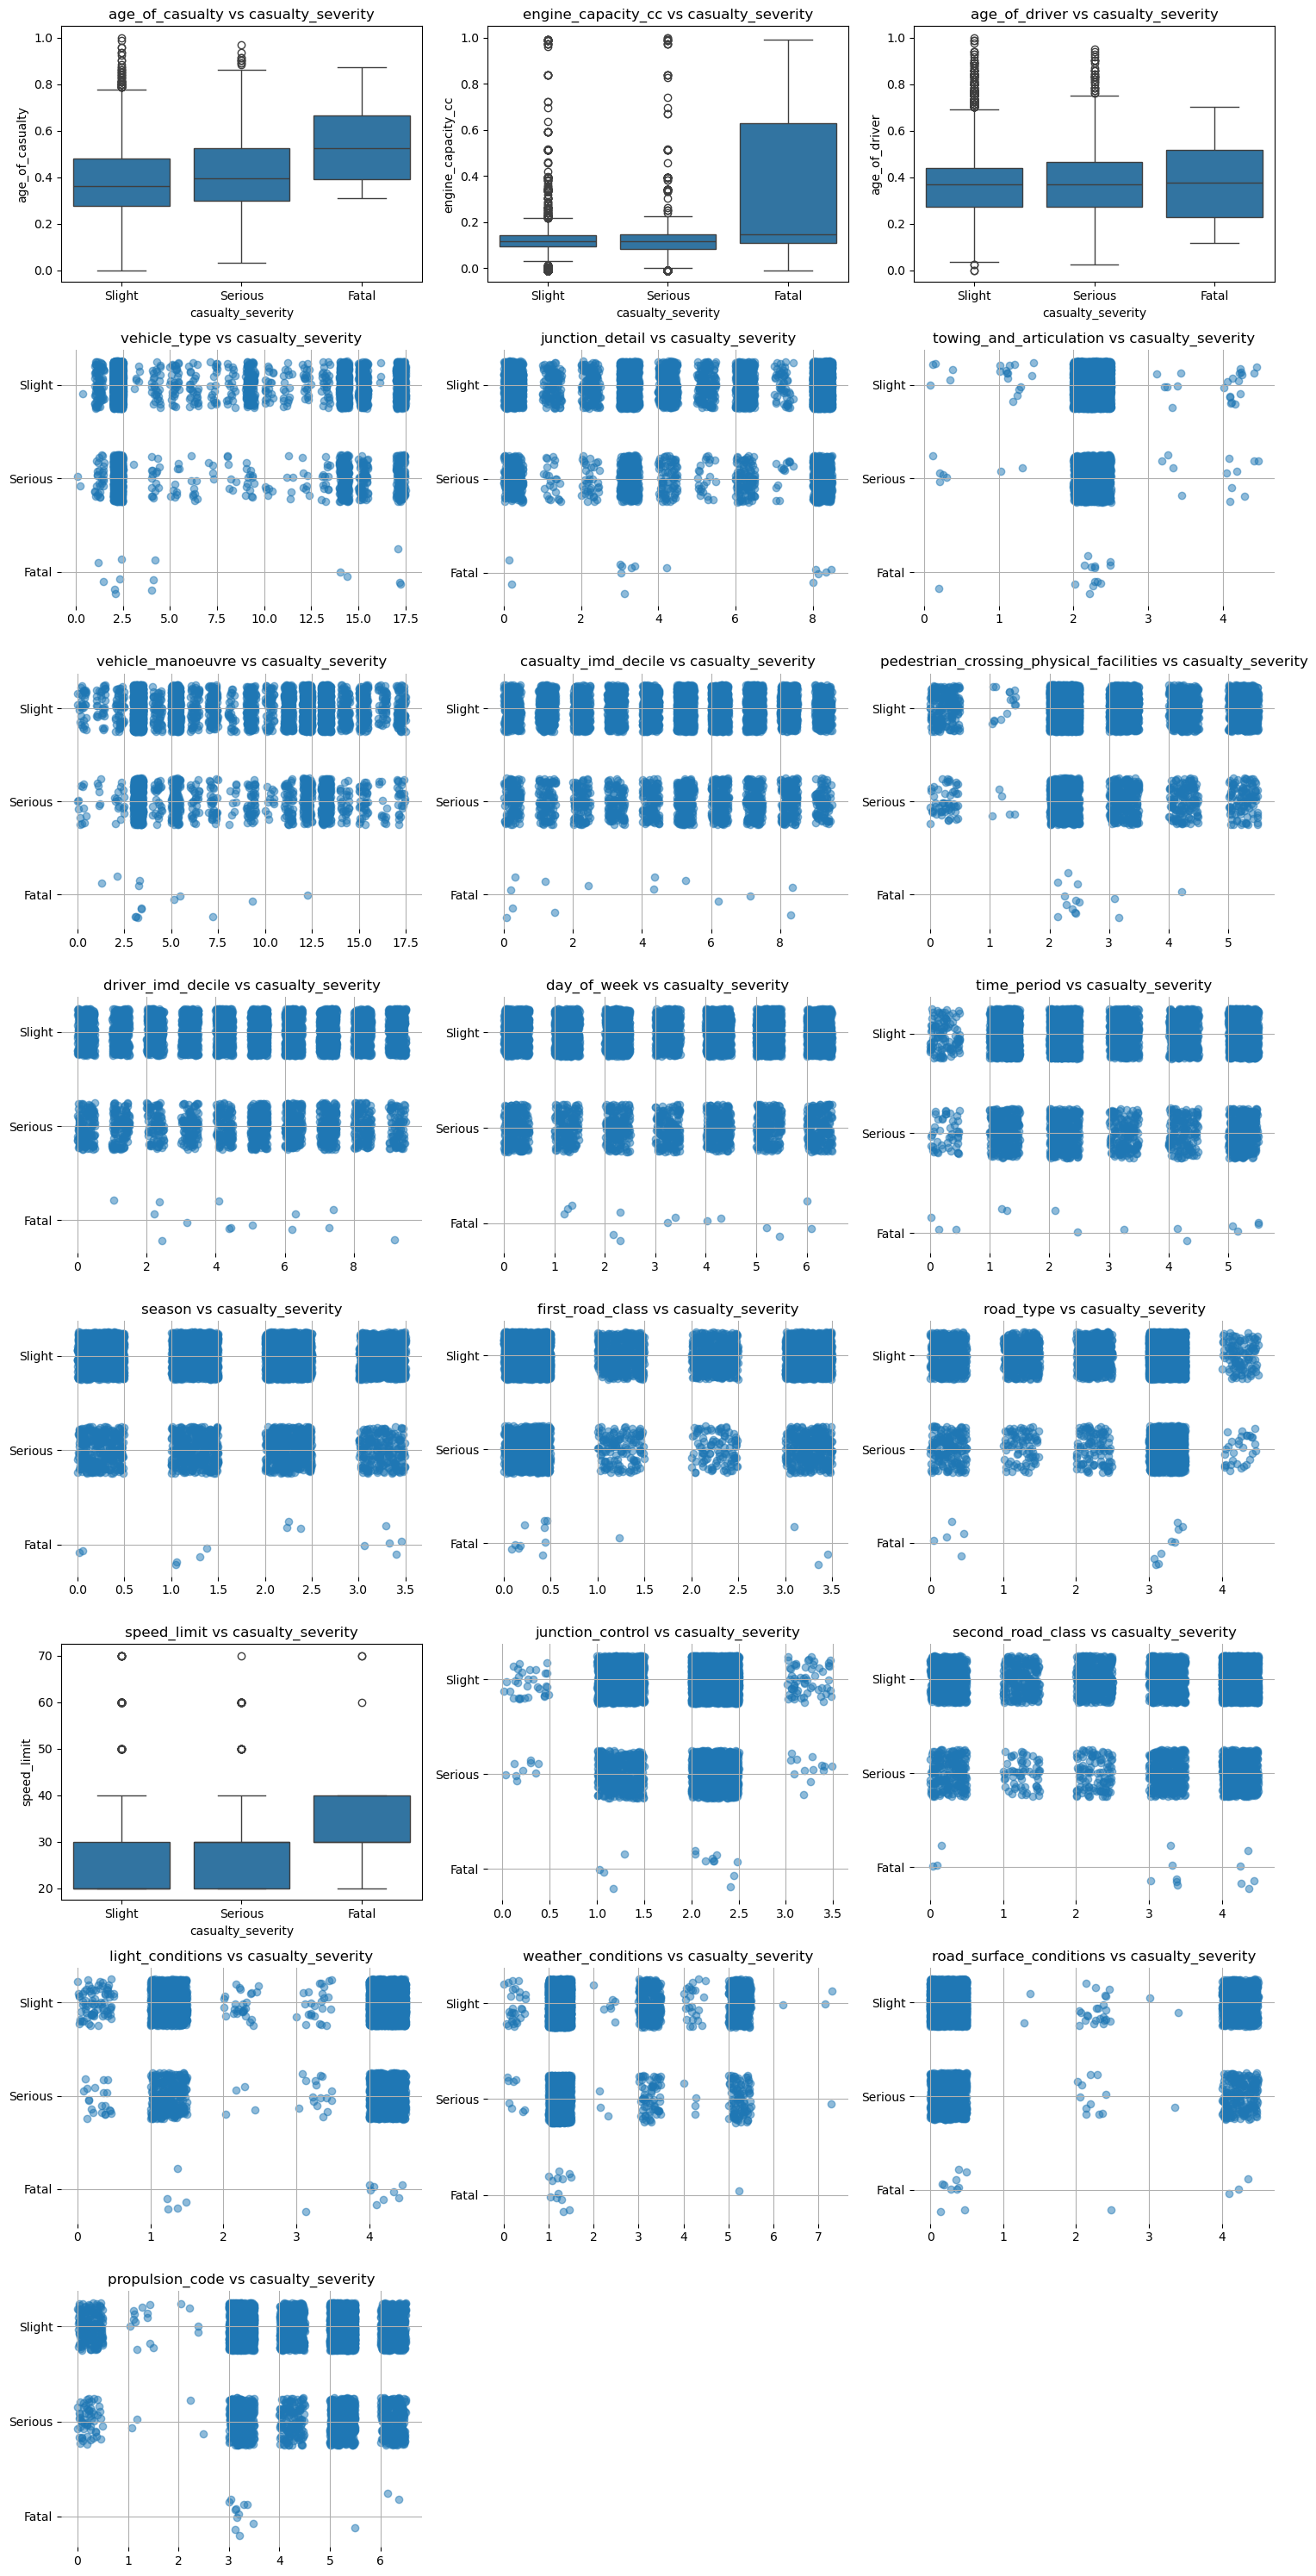

In [104]:
plot_correlation_grid(df, features)